In [1]:
import os
import numpy as np
from base import *

In [2]:
pth = r'\\10.99.134.183\kiemen-lab-data\DSAI\liver tissue data'
pthim = os.path.join(pth, '10x')
umpix = 1
pthtest = os.path.join(pth, 'testing image')
pthtestim = os.path.join(pthtest, '10x')
nm = 'Valentina_02_14_2024'
resolution = '10x'

WS = [[0, 0, 0, 0, 0, 0, 2], [7, 6], 
      [1, 2, 3, 4, 5, 6, 7], 
      [4, 6, 2, 3, 5, 1, 7], []]

numclass = max(WS[2])
sxy = 1024
pthDL = os.path.join(pth, nm)
nblack = numclass + 1
nwhite = WS[1][0]
cmap = np.array([[230, 190, 100],
                  [65, 155, 210],
                  [145, 35, 35],
                  [158, 24, 118],
                  [30, 50, 50],
                  [235, 188, 215],
                  [255, 255, 255]])
classNames = ['PDAC', 'bile duct', 'vasculature', 'hepatocyte','immune','stroma','whitespace']
classCheck = []
ntrain = 15
nvalidate = np.ceil(ntrain/5)
nTA = 2

______________DeepLabV3_plus_______________
Saving model metadata and classification colormap...
Max WS[2]: 7
Classnames: ['PDAC', 'bile duct', 'vasculature', 'hepatocyte', 'immune', 'stroma', 'whitespace']
Creating Net metadata file...
TensorFlow is using the following GPU: LogicalDevice(name='/device:GPU:0', device_type='GPU')


2025-02-18 18:44:57 - INFO - 
System Resources:
2025-02-18 18:44:57 - INFO - CPU Usage: 1.3%
2025-02-18 18:44:57 - INFO - System Memory: 84.1GB / 255.3GB (32.9%)
2025-02-18 18:44:57 - INFO - Process Memory: 1051.0MB
2025-02-18 18:44:57 - INFO - 
GPU Information:
2025-02-18 18:44:57 - INFO - 
Device: GPU 0
2025-02-18 18:44:57 - INFO - Name: NVIDIA RTX 5000 Ada Generation
2025-02-18 18:44:57 - INFO - Memory: 18033.0MB / 32760.0MB
2025-02-18 18:44:57 - INFO - Utilization: 1.0%
2025-02-18 18:45:42 - INFO - 
Initial Validation Dataset Information:
2025-02-18 18:45:42 - INFO - 
Initial-Validation Dataset Information:
2025-02-18 18:45:42 - INFO - Image batch shape: (3, 1024, 1024, 3)
2025-02-18 18:45:42 - INFO - Mask batch shape: (3, 1024, 1024, 1)
2025-02-18 18:45:42 - INFO - Class distribution in sample batch:
2025-02-18 18:45:42 - INFO -   Class 7: 1523717 pixels (48.44%)
2025-02-18 18:45:42 - INFO -   Class 5: 524271 pixels (16.67%)
2025-02-18 18:45:42 - INFO -   Class 0: 574689 pixels (1

Starting model training...
Saving model...
Training time: 0h 35m 56s
Testing segmentation model......
 
Importing annotation data...
Image 1 of 1: Liv-17_0101
 annotation data previously loaded
   
  Starting classification of image 1 of 1: Liv-17_0101.tif
Image 1 of 1 took 193 s
  Total time for classification: 0.0h 4.0m 25.48339557647705s


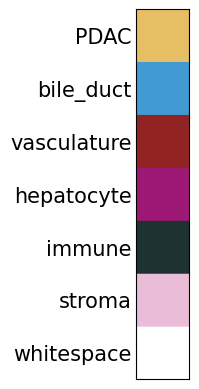

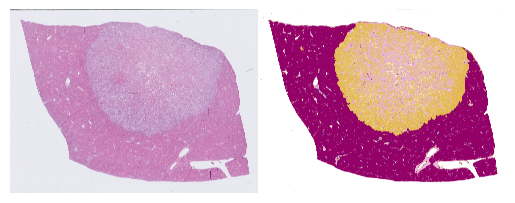


Calculating total number of pixels in the testing dataset...
  There are 372155 pixels of PDAC, 32% of the most common class.
  There are 23079 pixels of bile duct, 2% of the most common class.
  There are 20102 pixels of vasculature, 1% of the most common class.
  There are 1132115 pixels of hepatocyte. This is the most common class.
  There are 14449 pixels of immune, 1% of the most common class.
  There are 313420 pixels of stroma, 27% of the most common class.
  There are 781239 pixels of whitespace, 69% of the most common class.

  Only 14449 testing pixels of immune found.
    We suggest a minimum of 15,000 pixels for a good assessment of model accuracy.
    Confusion matrix may be misleading.


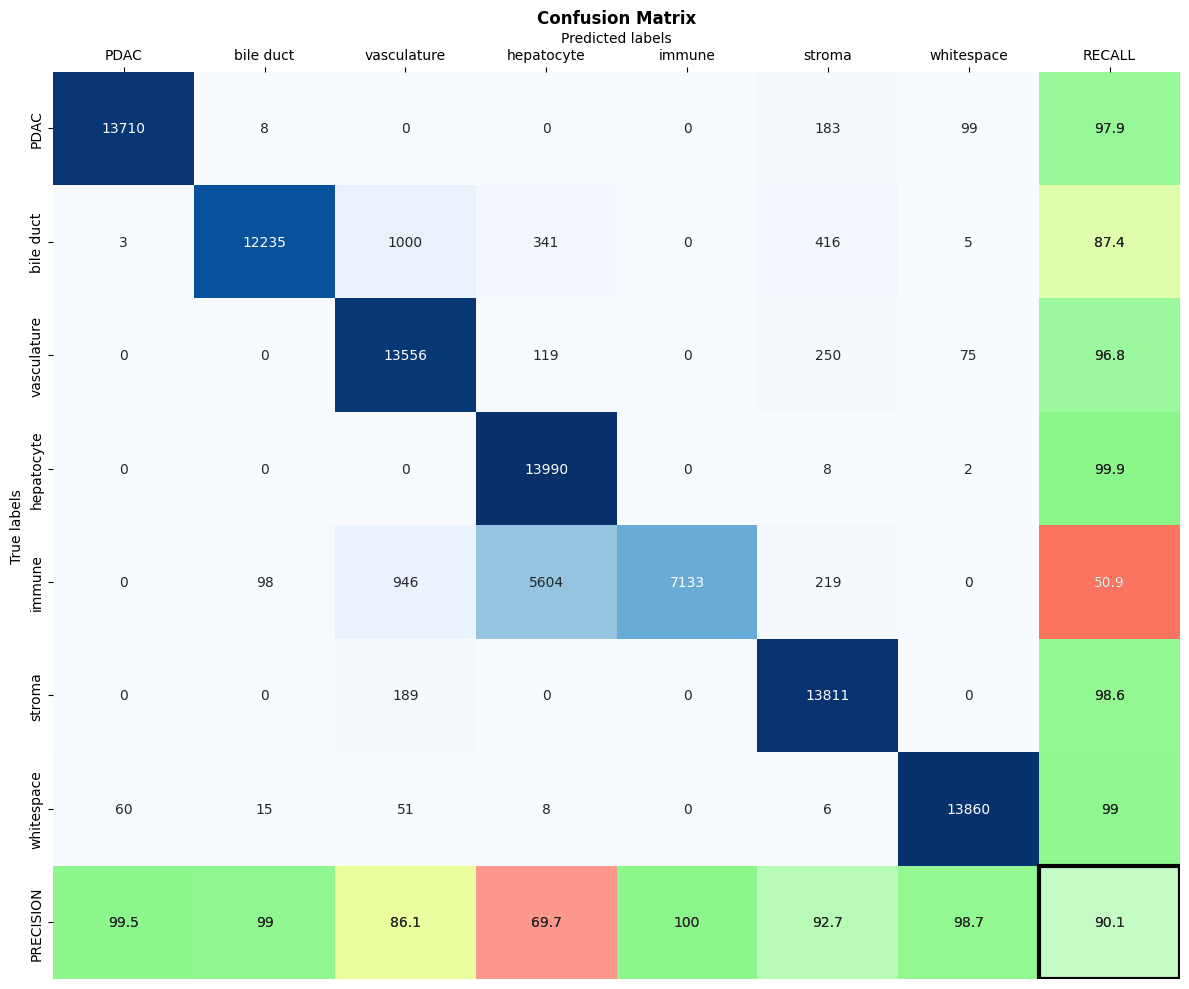


Confusion matrix saved to \\10.99.134.183\kiemen-lab-data\DSAI\liver tissue data\Valentina_02_14_2024\confusion_matrixDeepLabV3_plus.jpg

Overall Accuracy: 90.1%
__________________________________________


In [3]:
CNNs = ["DeepLabV3_plus"]

#Train test and classify an image for each CNN
for cnn_name in CNNs:
    print(f'______________{cnn_name}_______________')
    save_model_metadata_GUI(pthDL, pthim,pthtest, WS, nm, umpix, cmap, sxy, classNames, ntrain, nvalidate, nTA = 3,final_df = None, combined_df = None, model_type=cnn_name, batch_size=3)
    train_segmentation_model_cnns(pthDL)
    test_segmentation_model(pthDL,pthtest, pthtestim, cnn_name)
    # classify_images(pthim,pthDL, cnn_name)
    print(f'__________________________________________')